In [1]:
import sympy as smp
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import Eq, solve_linear_system, Matrix
from numpy import linalg
import numpy as np

In [2]:
eq1 = smp.Function('eq1')
eq2 = smp.Function('eq2')
eq3 = smp.Function('eq3')

In [3]:

C2 = smp.symbols('C2')
C3 = smp.symbols('C3')
C4 = smp.symbols('C4')

In [4]:
x = smp.symbols('x')

## Essential constants for solving Governing equation

$$\frac{d^2}{dx^2} T(x) - \frac{Ph}{kA}(T(x)-To)$$

In [5]:
h = 20
k = 200
d= 0.001
L = 0.05
To = 30
Tw = 300
P = np.pi*d
A = (np.pi*d**2)/4
m = (P*h)/(k*A)
n = np.sqrt(m)

In [6]:
m, P, A

## Quadratic polynomial as a Trial Solution

In [7]:
W1 = (x**2 - 2*L*x)

T_cap1 = 300 + C2*W1

Rd = (2*C2) - m*(T_cap1 - To)

eq1 = Eq(smp.integrate( W1*Rd, (x,0,L)))

C:\Users\My Account\anaconda3\lib\site-packages\sympy\core\relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


In [8]:
display(eq1)

In [9]:
9.0/0.000233333333333333

## Cubic polynomial as a Trial Solution

In [10]:

W1 = (x**2 - 2*L*x)
W2 = (x**3 - 3*(L**2)*x)

T_cap2 = Tw + C2*W1 +C3*W2
Rd = (2*C2 + 6*C3*x) - m*(T_cap2 - To)

eq1 = Eq(smp.integrate( W1*Rd, (x,0,L)))

In [11]:
eq2 = Eq(smp.integrate( W2*Rd, (x,0,L)))

In [12]:
display(eq1)
display(eq2)

In [13]:
row1 = [-1.3333328e-9, -2.49999898333333e-12, -8.66666666666667e-8]
row2 = [-2.49999898333333e-12, -4.79999805714286e-15, -1.625e-10]

In [14]:
row1

In [15]:
system = Matrix((row1, row2))

In [16]:
display(system)

⎡    -1.3333328e-9      -2.49999898333333e-12  -8.66666666666667e-8⎤
⎢                                                                  ⎥
⎣-2.49999898333333e-12  -4.79999805714286e-15       -1.625e-10     ⎦

In [17]:
display(solve_linear_system(system,C2,C3))

## Quartic polynomial as a Trial solution

In [18]:

W1 = (x**2 - 2*L*x)
W2 = (x**3 - 3*(L**2)*x)
W3 = (x**4 - 4*(L**3)*x)

T_cap3 = Tw + C2*W1 + C3*W2 + C4*W3
Rd = (2*C2 + 6*C3*x + 12*C4*(x**2)) - m*(T_cap3 -To)

eq1 = Eq(smp.integrate( W1*Rd, (x,0,L)))

In [19]:
display(eq1)

In [20]:
eq2 = Eq(smp.integrate( W2*Rd, (x,0,L)))

In [21]:
eq3 = Eq(smp.integrate( W3*Rd, (x,0,L)))

In [22]:
display(eq1)
display(eq2)
display(eq3)

In [23]:
row1 = [-1.33354666666667e-9, -2.50040666666667e-12, -3.60059047619048e-15, -7.2e-5]
row2 = [-2.50040666666667e-12, -4.80077714285714e-15, -7.00113e-18, -1.35e-7]
row3 = [-3.60059047619048e-15, -7.00113e-18, -1.02873587301587e-20, -1.944e-10]

In [24]:
system = Matrix((row1, row2, row3))

In [25]:
display(system)

⎡-1.33354666666667e-9   -2.50040666666667e-12  -3.60059047619048e-15   -7.2e-5
⎢                                                                             
⎢-2.50040666666667e-12  -4.80077714285714e-15      -7.00113e-18        -1.35e-
⎢                                                                             
⎣-3.60059047619048e-15      -7.00113e-18       -1.02873587301587e-20  -1.944e-

  ⎤
  ⎥
7 ⎥
  ⎥
10⎦

In [26]:
display(solve_linear_system(system,C2,C3,C4))

## Plotting

In [58]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

In [59]:
x = np.linspace(0,0.05,100)

In [60]:
𝐶21 = 38571.4285714286

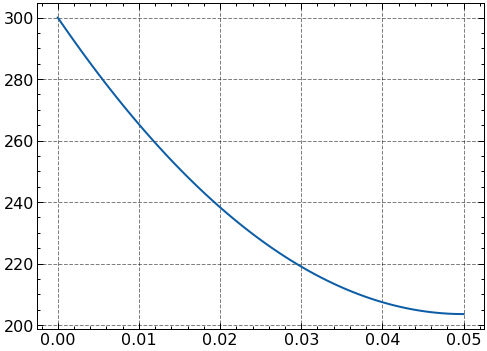

In [61]:
T_cap1 = Tw + 𝐶21*(x**2 - 2*L*x)
plt.plot(x,T_cap1)

In [62]:
𝐶32 = 0.00962963527798089

In [63]:
𝐶22 = 65.0000079444444

In [64]:
T_cap2 = Tw + 𝐶22*(x**2 - 2*L*x) + 𝐶32*(x**3 - 3*(L**2)*x)

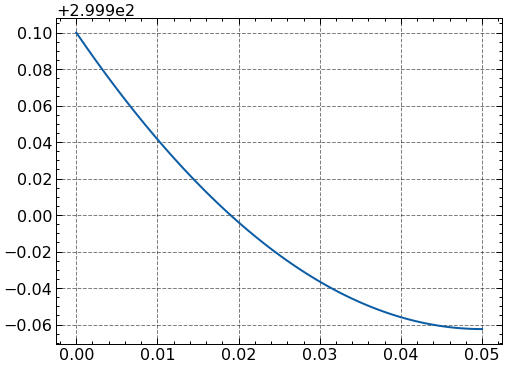

In [75]:
plt.plot(x,T_cap2)

In [66]:
𝐶23 = 53999.9999314248

In [67]:
𝐶33 = -7198.82874001508

In [68]:
𝐶43 = 1799730.03444018

In [69]:
T_cap3 = Tw + 𝐶23*(x**2 - 2*L*x) + 𝐶33*(x**3 - 3*(L**2)*x) + 𝐶43*(x**4 - 4*(L**3)*x)

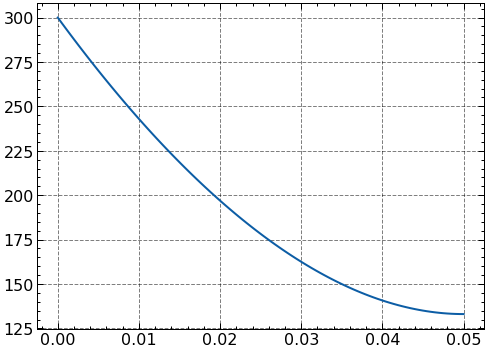

In [70]:
plt.plot(x,T_cap3)

In [71]:
T_exact = To + ((Tw - To)/(np.cosh(n*L)))*(np.cosh(n*(L-x)))

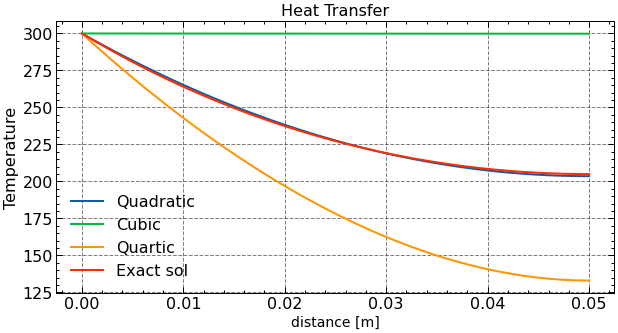

In [56]:
plt.figure(figsize=(10,5))
plt.plot(x,T_cap1,label='Quadratic')
plt.plot(x,T_cap2,label='Cubic')
plt.plot(x,T_cap3,label='Quartic')
plt.plot(x,T_exact,label='Exact sol')
plt.plot()
plt.legend()
plt.xlabel('distance [m]', fontsize=14)
plt.ylabel('Temperature')
plt.title('Heat Transfer')
plt.savefig("FEA.pdf")

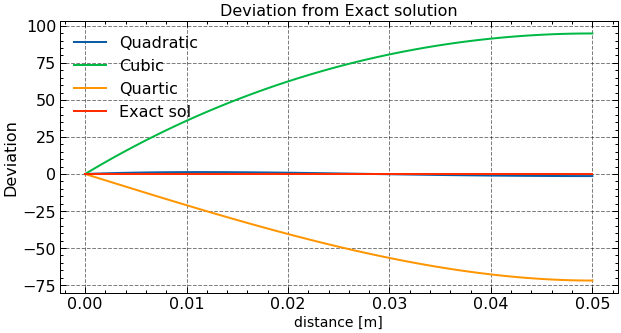

In [57]:
plt.figure(figsize=(10,5))
plt.plot(x,T_cap1 - T_exact,label='Quadratic')
plt.plot(x,T_cap2 - T_exact,label='Cubic')
plt.plot(x,T_cap3 - T_exact,label='Quartic')
plt.plot(x,T_exact - T_exact,label='Exact sol')
plt.plot()
plt.legend()
plt.xlabel('distance [m]', fontsize=14)
plt.ylabel('Deviation')
plt.title('Deviation from Exact solution')
plt.savefig("FEA_divergence.pdf")